This visualizes the gear number used in different parts of a specified Formula 1 race Circuit.

Here the Marina Bay Street Circuit is shown.

**FastF1 Installation:**

In [ ]:
pip install fastf1

**IMPORTS:**

In [ ]:
import fastf1 as f1

In [ ]:
#Only some imports are being used here
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np

from mpl_toolkits.axes_grid1 import make_axes_locatable


**CACHE:**

In [ ]:
plotting.setup_mpl()
f1.Cache.enable_cache('Cache')

**Loading Race Session:**

In [ ]:
session=f1.get_session(2019, 'Singapore Grand Prix','Q') ##(year,race,part)

In [ ]:
session.load()

core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v2.2.6]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver 23: Ignoring late data for a previously processed lap.The data may contain errors (previous: 8; current 9)
api         WARNING 	Driver  3: Ignoring late data for a previously processed lap.The data may contain errors (previous: 11; current 12)
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cache

**Gettting Telemetry Data:**

In [ ]:
#Getting the fastest lap in Qualifying
lap=session.laps.pick_fastest() 

# Getting telemetry data for the fastest lap
Tdata=lap.get_telemetry() 

**Data Types:**

In [ ]:
Tdata.info()

<class 'fastf1.core.Telemetry'>
Int64Index: 704 entries, 2 to 705
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Date                   704 non-null    datetime64[ns] 
 1   SessionTime            704 non-null    timedelta64[ns]
 2   DriverAhead            704 non-null    object         
 3   DistanceToDriverAhead  704 non-null    float64        
 4   Time                   704 non-null    timedelta64[ns]
 5   RPM                    704 non-null    int64          
 6   Speed                  704 non-null    int64          
 7   nGear                  704 non-null    int64          
 8   Throttle               704 non-null    int64          
 9   Brake                  704 non-null    bool           
 10  DRS                    704 non-null    int64          
 11  Source                 704 non-null    object         
 12  Distance               704 non-null    float64        
 

**Sample:**

In [ ]:
Tdata

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2019-09-21 13:58:45.710,0 days 01:13:44.606000,,527.036667,0 days 00:00:00,11340,276,7,100,False,12,interpolation,0.015391,0.000003,OnTrack,985,-197,188
3,2019-09-21 13:58:45.848,0 days 01:13:44.744000,,527.036667,0 days 00:00:00.138000,11375,277,7,100,False,12,pos,10.701036,0.002125,OnTrack,979,-144,188
4,2019-09-21 13:58:45.908,0 days 01:13:44.804000,,527.036667,0 days 00:00:00.198000,11445,279,7,100,False,12,car,15.391667,0.003057,OnTrack,975,-121,187
5,2019-09-21 13:58:46.148,0 days 01:13:45.044000,55,527.036667,0 days 00:00:00.438000,11547,285,7,100,False,12,pos,34.391667,0.006831,OnTrack,964,-35,188
6,2019-09-21 13:58:46.388,0 days 01:13:45.284000,55,515.103333,0 days 00:00:00.678000,11751,288,7,100,False,12,car,53.591667,0.010644,OnTrack,952,50,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2019-09-21 14:00:21.510,0 days 01:15:20.406000,55,473.963333,0 days 00:01:35.800000,10992,268,7,100,False,12,car,4997.954722,0.992665,OnTrack,1114,-1138,187
702,2019-09-21 14:00:21.549,0 days 01:15:20.445000,55,468.530000,0 days 00:01:35.839000,11050,271,7,100,False,12,pos,5000.902154,0.993250,OnTrack,1109,-1096,188
703,2019-09-21 14:00:21.750,0 days 01:15:20.646000,55,463.096667,0 days 00:01:36.040000,11108,275,7,100,False,12,car,5016.288056,0.996306,OnTrack,1076,-860,188
704,2019-09-21 14:00:21.849,0 days 01:15:20.745000,55,463.096667,0 days 00:01:36.139000,11237,277,7,100,False,12,pos,5023.933469,0.997824,OnTrack,1060,-740,188


**Getting Co-Ordinates of Track Layout:**

In [ ]:
X=np.array(Tdata['X'].values)
Y=np.array(Tdata['Y'].values)


In [ ]:
 #Forming X,Y arr

points=np.array([X,Y]).T.reshape(-1,1,2)

In [ ]:
segments=np.concatenate([points[:-1], points[1:]], axis=1)
print(segments)

[[[  985  -197]
  [  979  -144]]

 [[  979  -144]
  [  975  -121]]

 [[  975  -121]
  [  964   -35]]

 ...

 [[ 1109 -1096]
  [ 1076  -860]]

 [[ 1076  -860]
  [ 1060  -740]]

 [[ 1060  -740]
  [ 1046  -644]]]


**Fetching the Gear Selection Number Data:**

In [ ]:
gear=Tdata['nGear'].to_numpy().astype(float)
print(gear)

[7. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 6. 6. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 5. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 7. 7. 6. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 4. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.

**cmap Type is Specified:**

In [ ]:
#Qualitative(Paired) is selected as the colours will be segmented and not sequentially
#This is because the gear number ranges from 1-8 and is qualitative 

cmap=cm.get_cmap('Paired')

**Line Collection:**

In [ ]:
#Line collection helps to draw the whole track layout and change its colours according to the gear number

lc=LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc.set_array(gear)
lc.set_linewidth(8)

**Plotting:**

C:\Users\Abhis\AppData\Local\Temp\ipykernel_8412\344179696.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar=fig.colorbar(lc, label="Gear Number", boundaries=np.arange(1, 10),cax=ax,orientation='horizontal')


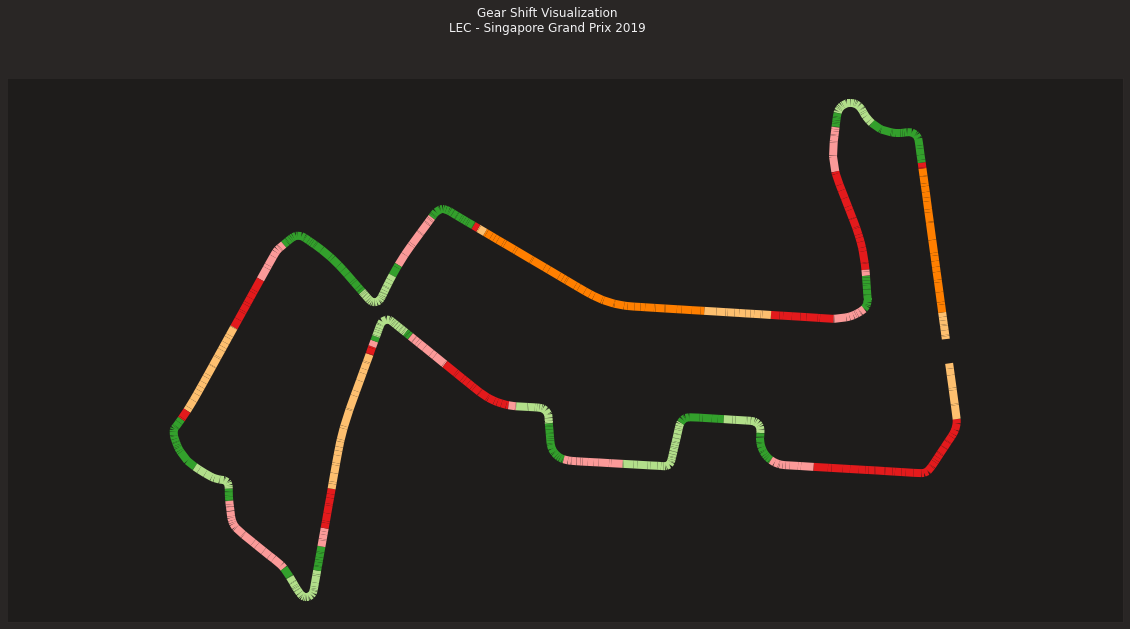

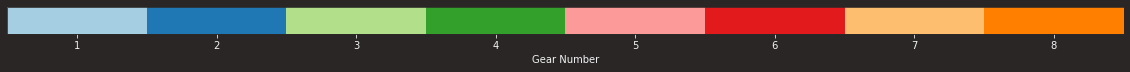

In [ ]:
import matplotlib as mpl

#Figure Parameters:

plt.gca().add_collection(lc)
plt.rcParams["figure.figsize"] = (20,10)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

#Title:

title = plt.suptitle(
    f"Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)

#SubPlot--Colour Bar for mapping/relating the gear number and colour shown on the track line.

fig,ax=plt.subplots(figsize=(41.35,0.5))
fig.subplots_adjust(right=0.5)

#SubPlot Parameters:

cbar=fig.colorbar(lc, label="Gear Number", boundaries=np.arange(1, 10),cax=ax,orientation='horizontal')




#cbar = plt.colorbar(lc, label="Gear Number", boundaries=np.arange(1, 10),cax=cax)
cbar.set_ticks(np.arange(1.5, 9.5))

cbar.set_ticklabels(np.arange(1, 9))


#plt.show()
